In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import os,sys

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

basepath = os.path.expanduser('~/Desktop/src/AllState_Claims_Severity/')
sys.path.append(os.path.join(basepath, 'src'))

np.random.seed(2016)

from data import *

In [2]:
train, test, sample_sub = load_data()

In [6]:
train.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

** Our dataset contains both categorical as well as continuous variables. **

In [7]:
# concatenate train and test set
data = pd.concat((train, test))

In [8]:
# set id as the index of our concatenated dataframe
data = data.set_index('id')

In [49]:
# take the target variable to log domain
data['log_loss'] = data.loss.map(np.log)

In [14]:
def unique_values(data):
    features = data.columns[:-1]
    
    for feat in features:
        print('Feature: {}'.format(feat))
        print('Number of unique values in training set: {}'.format(data[:len(train)][feat].nunique()))
        print('Number of unique values in test set: {}'.format(data[len(train):][feat].nunique()))
        print('\n')

In [15]:
unique_values(data)

Feature: cat1
Number of unique values in training set: 2
Number of unique values in test set: 2


Feature: cat10
Number of unique values in training set: 2
Number of unique values in test set: 2


Feature: cat100
Number of unique values in training set: 15
Number of unique values in test set: 15


Feature: cat101
Number of unique values in training set: 19
Number of unique values in test set: 17


Feature: cat102
Number of unique values in training set: 9
Number of unique values in test set: 7


Feature: cat103
Number of unique values in training set: 13
Number of unique values in test set: 14


Feature: cat104
Number of unique values in training set: 17
Number of unique values in test set: 17


Feature: cat105
Number of unique values in training set: 20
Number of unique values in test set: 18


Feature: cat106
Number of unique values in training set: 17
Number of unique values in test set: 18


Feature: cat107
Number of unique values in training set: 20
Number of unique values in test

In [45]:
data['cont1'].describe()

count    313864.000000
mean          0.494096
std           0.187768
min           0.000016
25%           0.347403
50%           0.475784
75%           0.625272
max           0.984975
Name: cont1, dtype: float64

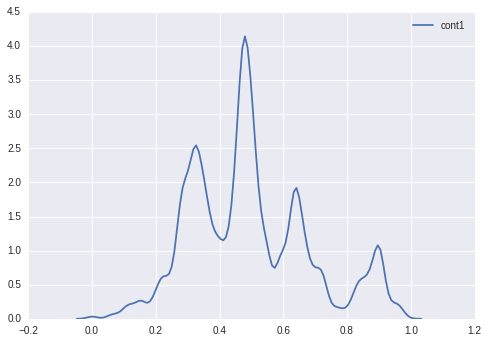

In [46]:
sns.kdeplot(data.cont1)

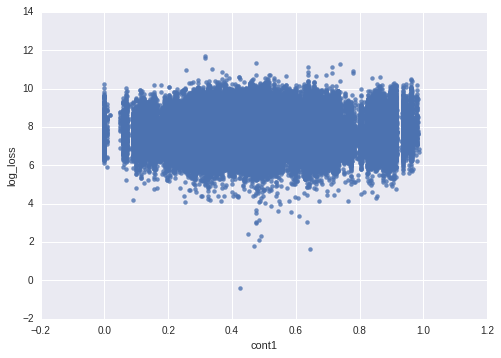

In [50]:
sns.regplot(x='cont1', y='log_loss', data=data[:len(train)], fit_reg=False);

In [51]:
continuous_variables = [col for col in data.columns if 'cont' in col]
print('Number of continuous variables are: {}'.format(len(continuous_variables)))

Number of continuous variables are: 14


In [52]:
continuous_variables

['cont1',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9']

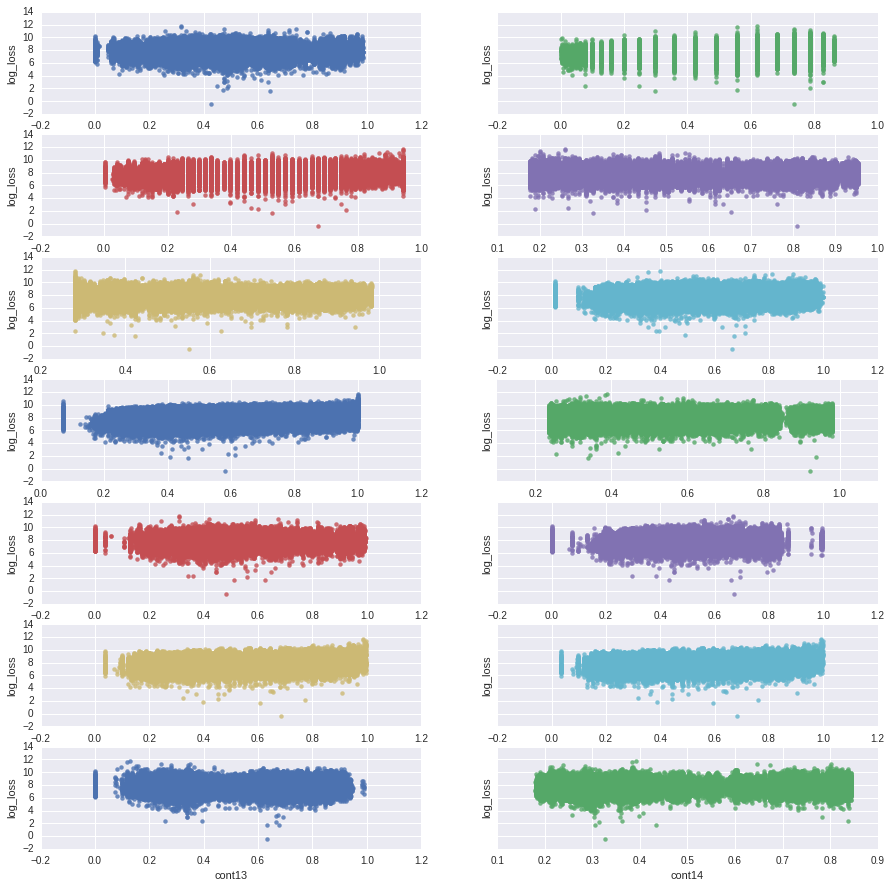

In [55]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15, 10), sharey=True)

sns.regplot(x='cont1', y='log_loss', data=data[:len(train)], fit_reg=False, ax=ax[0][0])
sns.regplot(x='cont2', y='log_loss', data=data[:len(train)], fit_reg=False, ax=ax[0][1])
sns.regplot(x='cont3', y='log_loss', data=data[:len(train)], fit_reg=False, ax=ax[1][0])
sns.regplot(x='cont4', y='log_loss', data=data[:len(train)], fit_reg=False, ax=ax[1][1])
sns.regplot(x='cont5', y='log_loss', data=data[:len(train)], fit_reg=False, ax=ax[2][0])
sns.regplot(x='cont6', y='log_loss', data=data[:len(train)], fit_reg=False, ax=ax[2][1])
sns.regplot(x='cont7', y='log_loss', data=data[:len(train)], fit_reg=False, ax=ax[3][0])
sns.regplot(x='cont8', y='log_loss', data=data[:len(train)], fit_reg=False, ax=ax[3][1])
sns.regplot(x='cont9', y='log_loss', data=data[:len(train)], fit_reg=False, ax=ax[4][0])
sns.regplot(x='cont10', y='log_loss', data=data[:len(train)], fit_reg=False, ax=ax[4][1])
sns.regplot(x='cont11', y='log_loss', data=data[:len(train)], fit_reg=False, ax=ax[5][0])
sns.regplot(x='cont12', y='log_loss', data=data[:len(train)], fit_reg=False, ax=ax[5][1])
sns.regplot(x='cont13', y='log_loss', data=data[:len(train)], fit_reg=False, ax=ax[6][0])
sns.regplot(x='cont14', y='log_loss', data=data[:len(train)], fit_reg=False, ax=ax[6][1]);

** Summary **

* Cont1, Cont6, Cont8, Cont9, Cont10, Cont11, Cont12 has some of the values clubbed at around 0.0 which might need some treatment.
* Cont2, Cont3 can be considered as a categorical variable ?
* Rest of the continuous variables are not providing much information regarding the target variable.